# Clustering

In practice, clustering helps identify two qualities of data:

1. **Meaningfulness**: Meaningful clusters expand domain knowledge.

    E.g., in the medical field, researchers applied clustering to gene expression experiments. The clustering results identified groups of patients who respond differently to medical treatments.

2. **Usefulness**: Useful clusters, on the other hand, serve as an intermediate step in a data pipeline.

    E.g., businesses use clustering for customer segmentation. The clustering results segment customers into groups with similar purchase histories, which businesses can then use to create targeted advertising campaigns.

---

There are 3 categories/families of techniques of clustering:

1. Partitional clustering
2. Hierarchical clustering
3. Density-based clustering

We will explore an **example** of each in this tutorial, as well as their **strengths** and **weaknesses**.

---

There are [many applications](https://en.wikipedia.org/wiki/Cluster_analysis#Applications) for clustering across different industies like Biology, Medicine, Business and Marketing, Social Science, just to name a few.

> This tutorial is derived from:
> *  an exercsie file from linkedinlearning.com AND
> * [this great tutorial](https://realpython.com/k-means-clustering-python/).

# 1. Partitional Clustering: K-means
**Partitional clustering** divides data objects into nonoverlapping groups. In other words, no object can be a member of more than one cluster, and every cluster must have at least one object.

Partitional clustering methods have several **strengths**:

* They work well when clusters have a **spherical shape**.
* They’re **scalable** with respect to algorithm complexity.

They also have several **weaknesses**:

* They’re not well suited for clusters with **complex shapes** and different sizes.
* They break down when used with clusters of different **densities**.

### Setting up for clustering analysis

In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

Loading Iris dataset, a famous dataset being used for clustering tutorials. More information: https://archive.ics.uci.edu/ml/datasets/iris

**Structure of the dataset**:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

![](https://machinelearninghd.com/wp-content/uploads/2021/03/iris-dataset.png)

In [51]:
# load data => comes in a dictionary that has 
# - data: matrix of flowers examined x features
# - target: array of the target column
# - feature_names: array of feature names
# - DESCR: a description of the dataset

iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [52]:

from sklearn.preprocessing import scale

# scale the data to have 0 mean and unit variance (i.e., variance=1) 
# this streamlines the distance calculation => each feature has the same "weight"
scaled_data = scale(iris.data)

# save feature names
variable_names = iris.feature_names

# save feature data into a dataframe
X = pd.DataFrame(scaled_data, columns=variable_names)

# load the target into a dataframe
y = pd.DataFrame(iris.target)

# name the column of the target
y.columns = ['Target']

# show the first 5 rows of data
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Building and running your model

In [53]:
# initialize a K-Means clustering object with:
# 3 clusters
# random state = 5 (to get same results everytime, since K-Means is a randomized algorithm)
clustering  = KMeans(n_clusters=3,random_state=5)

# fit the model to the feature data
clustering.fit(X)
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

## Plotting your model outputs

In [54]:
# load the features into a dataframe (unscaled)
iris_df = pd.DataFrame(iris.data, columns=variable_names)

# show the first 5 rows of data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


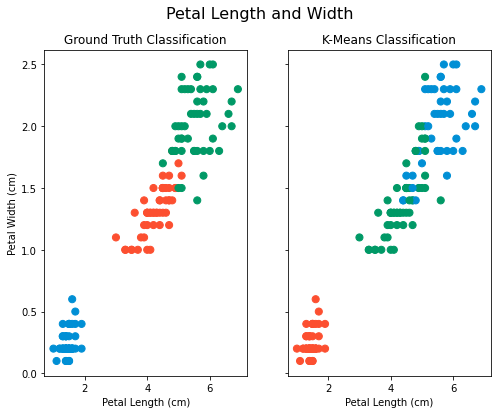

In [55]:
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True)

fig.suptitle("Petal Length and Width", fontsize=16)

# make a color theme that has 3 colors for the 3 clusters
color_theme = np.array(['#008fd5','#fc4f30','#009966'])

# plot a scatter plot that has the original classes
# have petal length as the x-axis and pental width for the y-axis
ax1.scatter(x=iris_df['petal length (cm)'], 
            y=iris_df['petal width (cm)'], 
            c=color_theme[iris.target], 
            s=50)
ax1.set_xlabel('Petal Length (cm)')
ax1.set_ylabel('Petal Width (cm)')
ax1.set_title('Ground Truth Classification')

# plot a scatter plot that has the resulting clusters of K-Means
# have petal length as the x-axis and pental width for the y-axis
ax2.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=color_theme[clustering.labels_],
            s=50)
ax2.set_xlabel('Petal Length (cm)')
ax2.set_title('K-Means Classification')

plt.show()

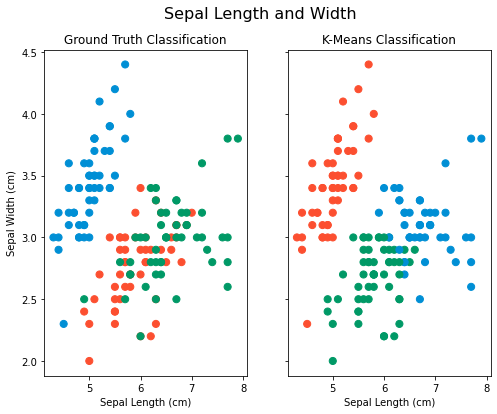

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)

fig.suptitle("Sepal Length and Width", fontsize=16)

# plot a scatter plot that has the original classes
# have sepal length as the x-axis and pental width for the y-axis
ax1.scatter(x=iris_df['sepal length (cm)'], 
            y=iris_df['sepal width (cm)'], 
            c=color_theme[iris.target], 
            s=50)
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Sepal Width (cm)')
ax1.set_title('Ground Truth Classification')

# plot a scatter plot that has the resulting clusters of K-Means
# have sepal length as the x-axis and pental width for the y-axis
ax2.scatter(x=iris_df['sepal length (cm)'],
            y=iris_df['sepal width (cm)'],
            c=color_theme[clustering.labels_],
            s=50)
ax2.set_xlabel('Sepal Length (cm)')
ax2.set_title('K-Means Classification')

plt.show()

## How to find the optimal number of clusters?

**Elbow method** is the most common method for determining the appropriate number of clusters. 
> "One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data" (Wikipedia)

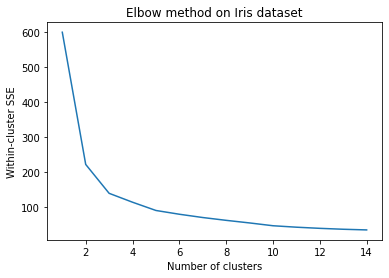

In [57]:
# Elbow method

# initlaize a dictionary to have {n_clusters:within_cluster_SSE}
distortations = {}

max_n_clusters = 15

# run a for loop to cluster the dataset with 1:max_n_clusters and save their SSE
for k in range(1, max_n_clusters):
  # initialize a K-Means object with n_clusters=k
  kmeans = KMeans(n_clusters=k)
  # fit the model to the scaled data
  kmeans.fit(X)
  # record the within-cluster Sum of Squared Error (SSE) for this number of clusters
  distortations[k] = kmeans.inertia_

# plot the elbow grpah (within-cluster SSE vs # clusters)
plt.plot(list(distortations.keys()), 
         list(distortations.values()))
plt.title('Elbow method on Iris dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

As shown in the graph, the appropiate number of clusters is either 2 or 3.

In [58]:
# print the difference in within-cluster SSE
print("Difference in within-cluster SSE:")
for k in range(1, max_n_clusters - 1):
    print("{} - {}: {}"
          .format(k, k + 1, distortations[k] - distortations[k + 1]))

Difference in within-cluster SSE:
1 - 2: 377.6382950349771
2 - 3: 82.5412086052732
3 - 4: 25.407934540788887
4 - 5: 23.605278668175515
5 - 6: 10.77071681616846
6 - 7: 9.37792647631369
7 - 8: 8.048609951039253
8 - 9: 7.4086952796644
9 - 10: 8.015469027779105
10 - 11: 4.141537147392441
11 - 12: 3.273718604377038
12 - 13: 2.6301819452842636
13 - 14: 1.877174120926199


Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, `kneed`, to identify the elbow point programmatically.

In [59]:
!pip install kneed
from kneed import KneeLocator

# make an instance of KneeLocator and give it:
# - list of # of clusters
# - list of respective SSE
# - curvature of graph ("concave" or "convex")
# - direction of curve ("increasing" or "decreasing")
kl = KneeLocator(
    list(distortations.keys()), 
    list(distortations.values()), 
    curve="convex", 
    direction="decreasing"
)

# the elbow attribute stores the optimal # of clusters
kl.elbow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


3

# 2. Hierarchical Clustering: Dendrogram
A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters.  

The **strengths** of hierarchical clustering methods include the following:

* They often reveal the finer details about the **relationships** between data objects.
* They provide an **interpretable dendrogram**.  

The **weaknesses** of hierarchical clustering methods include the following:

* They’re **computationally expensive** with respect to algorithm complexity.
* They’re sensitive to **noise** and **outliers**.

**How do I read a Dendrogram?**  
The key to interpreting a dendrogram is to focus on the height at which any two objects are joined together. In the example above, we can see that E and F are most similar, as the height of the link that joins them together is the smallest. The next two most similar objects are A and B.

> Read more [here](https://www.displayr.com/what-is-dendrogram/).

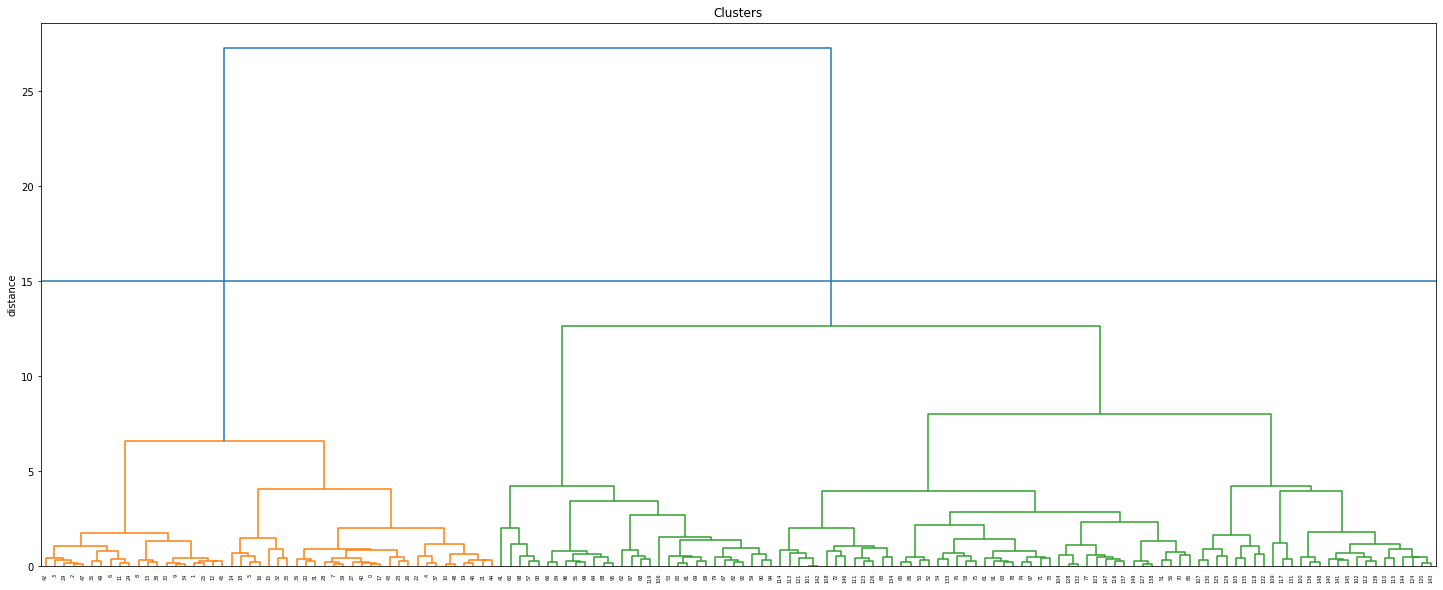

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage

# perform hierarchical/agglomerative clustering
# use ward's method, a.k.a. minimal increase of sum-of-squares
#
# Ward's method is the closest, by it properties and efficiency, 
# to K-means clustering; they share the same objective function - 
# minimization of the pooled within-cluster SS "in the end".
#
Z = linkage(X,method='ward')

# plot the dendrogram based on this hierarchical clustering
plt.figure(figsize=(25,10))
plt.title('Clusters')
plt.ylabel('distance')
dendrogram(Z)

plt.axhline(y=15)
plt.show()

# 3. Desnity Based Clustering: DBSCAN

**Density-based clustering** determines cluster assignments based on the density of data points in a region. Clusters are assigned where there are high densities of data points separated by low-density regions.

Sometimes, the clustering of the data cannot be accurately captured by K-Means, since the shape of the clusters is not spherical. In this case, we can use Density-Based Spatial Clustering of Applications with Noise (or `DBSCAN`).

The **strengths** of density-based clustering methods include the following:

* They excel at identifying clusters of **nonspherical shapes**.
* They’re resistant to **outliers**.

The **weaknesses** of density-based clustering methods include the following:

* They aren’t well suited for clustering in **high-dimensional spaces**.
* They have trouble identifying clusters of **varying densities**.

In [61]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler

In [62]:
# make a random dataset that has:
# - 250 points
# - 5% noise
# - random state of 42 to ensure we get the same results everytime
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42)

# initialize a StandardScaler instance
scaler = StandardScaler()

# scale the data to have 0 mean and unit varaince (i.e., variance=1) 
# this streamlines the distance calculation => each feature has the same "weight"
scaled_features = scaler.fit_transform(features)
scaled_features.shape

(250, 2)

In [63]:
# Instantiate k-means with 2 clusters
kmeans = KMeans(n_clusters=2)

# Instantiate dbscan with:
# - maximum distance between 2 samples to be neighbors as 0.3
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

DBSCAN(eps=0.3)

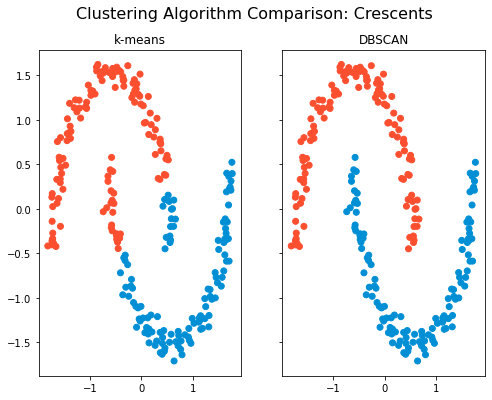

In [64]:
# Plot the results of the clustering
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle("Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title("k-means")

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title("DBSCAN")
plt.show()

## Extra Resources
If you plan on using K-Means in your project, you might wanna take a look at [this tutorial](https://realpython.com/k-means-clustering-python/) to learn about data pipelining (especially if you are dealing with large volumes of data).